In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import scipy
import statsmodels.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
path = "../../data/"

In [3]:
df_parcels = pd.read_csv(path + "EXTR_Parcel.csv", encoding='latin-1')

In [4]:
df_parcels.head()

,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,889250,80,,VELKOFF JOHN ADD,8,,5,22,8,SE,...,N,N,N,N,N,N,N,N,N,N
1,736360,275,,ROBERTS JAY COUNTRY CLUB ESTATES,8,2,4,26,34,SE,...,N,N,N,N,N,N,N,N,N,N
2,600350,635,,NAGLES 2ND ADD,6,28,4,25,32,NE,...,N,N,N,N,N,N,N,N,N,N
3,635260,760,,OLD MILL POINT,TRACT I,,6,25,18,SE,...,N,N,N,N,N,N,N,N,N,N
4,333250,15,,HILLMAN CITY DIV NO. 05,3-4,1,4,24,22,SE,...,N,N,N,N,N,N,N,N,N,N


In [5]:
df_parcels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614337 entries, 0 to 614336
Data columns (total 81 columns):
Major                     614337 non-null int64
Minor                     614337 non-null int64
PropName                  601485 non-null object
PlatName                  520002 non-null object
PlatLot                   614337 non-null object
PlatBlock                 614337 non-null object
Range                     614337 non-null int64
Township                  614337 non-null int64
Section                   614337 non-null int64
QuarterSection            614337 non-null object
PropType                  614337 non-null object
Area                      614307 non-null float64
SubArea                   614307 non-null float64
SpecArea                  17333 non-null float64
SpecSubArea               17333 non-null float64
DistrictName              614337 non-null object
LevyCode                  614337 non-null int64
CurrentZoning             614336 non-null object
HBUAsIfVaca

In [6]:
df_parcels.describe()

,Major,Minor,Range,Township,Section,Area,SubArea,SpecArea,SpecSubArea,LevyCode,...,WfntPoorQuality,WfntRestrictedAccess,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,NbrBldgSites,Contamination,HistoricSite,CurrentUseDesignation
count,614337.000000,614337.000000,614337.000000,614337.000000,614337.000000,614307.000000,614307.000000,17333.000000,17333.000000,614337.000000,...,614337.000000,614337.000000,614337.000000,614337.000000,614337.000000,614337.000000,614337.000000,614337.000000,614337.000000,614337.000000
mean,436174.113395,1935.319538,4.606400,23.831719,18.278460,48.231969,8.511542,263.329949,177.170426,1673.911881,...,0.001388,0.009384,0.023905,0.072708,0.201103,0.039482,0.012964,0.023287,0.003454,0.015223
std,285636.123029,3206.722541,1.205405,1.726335,10.266112,27.245628,12.291469,243.031568,140.435381,1935.550193,...,0.037237,0.145104,0.221229,2.722879,0.554112,1.565884,0.522860,1.034725,0.101369,0.204579
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,192930.000000,120.000000,4.000000,23.000000,9.000000,25.000000,3.000000,100.000000,65.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,362993.000000,367.000000,4.000000,24.000000,18.000000,47.000000,5.000000,100.000000,135.000000,1205.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,720000.000000,1395.000000,5.000000,25.000000,27.000000,71.000000,9.000000,500.000000,290.000000,2202.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,990600.000000,9696.000000,14.000000,99.000000,36.000000,540.000000,110.000000,800.000000,774.000000,7570.000000,...,1.000000,3.000000,3.000000,361.000000,3.000000,70.000000,196.000000,46.000000,3.000000,4.000000


In [7]:
df_ResBldg = pd.read_csv(path + "EXTR_ResBldg.csv")

/Users/calvintirrell/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df_ResBldg.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,8400,130,1,1,215 SW 129TH ST 98146,215,,SW,129TH,ST,...,0,0,0,1942,0,0,0,0,4,0
1,8400,346,1,1,326 SW 132ND ST 98146,326,,SW,132ND,ST,...,1,0,1,1961,0,0,0,0,4,0
2,8700,121,1,1,16828 104TH AVE SE 98055,16828,,,104TH,AVE,...,0,0,0,1962,0,0,0,0,4,0
3,8700,123,1,1,16814 104TH AVE SE,16814,,,104TH,AVE,...,0,0,0,2011,0,0,0,0,3,0
4,8700,256,1,1,16836 106TH AVE SE 98055,16836,,,106TH,AVE,...,0,0,0,1947,0,0,0,0,3,0


In [9]:
df_ResBldg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514509 entries, 0 to 514508
Data columns (total 50 columns):
Major                 514509 non-null int64
Minor                 514509 non-null int64
BldgNbr               514509 non-null int64
NbrLivingUnits        514509 non-null int64
Address               514509 non-null object
BuildingNumber        514509 non-null object
Fraction              514509 non-null object
DirectionPrefix       514011 non-null object
StreetName            514509 non-null object
StreetType            514509 non-null object
DirectionSuffix       514011 non-null object
ZipCode               469267 non-null object
Stories               514509 non-null float64
BldgGrade             514509 non-null int64
BldgGradeVar          514509 non-null int64
SqFt1stFloor          514509 non-null int64
SqFtHalfFloor         514509 non-null int64
SqFt2ndFloor          514509 non-null int64
SqFtUpperFloor        514509 non-null int64
SqFtUnfinFull         514509 non-null int64

In [10]:
df_ResBldg.describe()

,Major,Minor,BldgNbr,NbrLivingUnits,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
count,514509.000000,514509.000000,514509.000000,514509.000000,514509.000000,514509.000000,514509.000000,514509.000000,514509.000000,514509.000000,...,514509.000000,514509.000000,514509.000000,514509.000000,514509.000000,514509.000000,514509.000000,514509.000000,514509.000000,5.145090e+05
mean,447981.505136,1588.557090,1.015249,1.020927,1.459307,7.607498,0.012561,1299.598075,51.956273,454.808991,...,0.338410,0.075357,0.197913,1969.794280,92.921904,0.314185,0.156759,0.009928,3.364137,6.627504e+02
std,286353.549305,2879.066569,0.258514,0.166770,0.509177,1.185102,1.099957,496.736491,178.144906,638.067179,...,0.512716,0.276876,0.417623,29.659068,420.448260,4.734014,2.755803,0.647390,0.611489,5.672556e+03
min,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1894.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,202203.000000,115.000000,1.000000,1.000000,1.000000,7.000000,0.000000,990.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000e+00
50%,383400.000000,329.000000,1.000000,1.000000,1.000000,7.000000,0.000000,1230.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1971.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000e+00
75%,722750.000000,1030.000000,1.000000,1.000000,2.000000,8.000000,0.000000,1510.000000,0.000000,940.000000,...,1.000000,0.000000,0.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000e+00
max,990600.000000,9694.000000,31.000000,9.000000,5.000000,20.000000,99.000000,22860.000000,8800.000000,14834.000000,...,7.000000,5.000000,7.000000,2020.000000,2020.000000,100.000000,99.000000,100.000000,5.000000,2.500000e+06


In [11]:
df_RPSale = pd.read_csv(path + "EXTR_RPSale.csv")

/Users/calvintirrell/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df_RPSale.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,...,11,6,3,N,N,N,N,1,8,


In [13]:
df_RPSale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072949 entries, 0 to 2072948
Data columns (total 24 columns):
ExciseTaxNbr          int64
Major                 object
Minor                 object
DocumentDate          object
SalePrice             int64
RecordingNbr          object
Volume                object
Page                  object
PlatNbr               object
PlatType              object
PlatLot               object
PlatBlock             object
SellerName            object
BuyerName             object
PropertyType          int64
PrincipalUse          int64
SaleInstrument        int64
AFForestLand          object
AFCurrentUseLand      object
AFNonProfitUse        object
AFHistoricProperty    object
SaleReason            int64
PropertyClass         int64
SaleWarning           object
dtypes: int64(7), object(17)
memory usage: 379.6+ MB


In [14]:
df_RPSale.describe()

,ExciseTaxNbr,SalePrice,PropertyType,PrincipalUse,SaleInstrument,SaleReason,PropertyClass
count,2.072949e+06,2.072949e+06,2.072949e+06,2.072949e+06,2.072949e+06,2.072949e+06,2.072949e+06
mean,2.055186e+06,6.032778e+05,3.289523e+00,4.622243e+00,7.350214e+00,5.387771e+00,6.513530e+00
std,5.756850e+05,6.105837e+06,4.320505e+00,2.603418e+00,6.617225e+00,6.242880e+00,2.479836e+00
min,4.565830e+05,-6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.586605e+06,0.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00
50%,2.066742e+06,1.510000e+05,3.000000e+00,6.000000e+00,3.000000e+00,1.000000e+00,8.000000e+00
75%,2.543240e+06,3.550000e+05,3.000000e+00,6.000000e+00,1.500000e+01,1.000000e+01,8.000000e+00
max,3.035857e+06,7.398850e+08,9.900000e+01,1.100000e+01,2.800000e+01,1.900000e+01,9.000000e+00


In [15]:
def common_columns(a,b):
    """input panda dataframes and returs list of columns they have in common"""
    a_set = set(a.columns)
    b_set = set(b.columns)
    if (a_set & b_set):
        print(a_set, b_set)
    else:
        print('nothing in common')

In [16]:
all_dfs = [df_RPSale, df_ResBldg, df_parcels]
for df in all_dfs:
    df['Major'] = df['Major'].astype('str').str.zfill(6)
    df['Minor'] = df['Minor'].astype('str').str.zfill(4)
for df in all_dfs:
    df['Major_Minor'] = df['Major'] + df['Minor']

In [17]:
df_parcels['Major_Minor'][0]

'8892500080'

In [18]:
combined_df = pd.merge(df_parcels, df_RPSale, on='Major_Minor')

In [19]:
combined_df = pd.merge(combined_df, df_ResBldg, on='Major_Minor')

In [20]:
combined_df.head()

,Major_x,Minor_x,PropName,PlatName,PlatLot_x,PlatBlock_x,Range,Township,Section,QuarterSection,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,889250,0080,,VELKOFF JOHN ADD,8,,5,22,8,SE,...,0,0,0,1965,0,0,0,0,3,0
1,889250,0080,,VELKOFF JOHN ADD,8,,5,22,8,SE,...,0,0,0,1965,0,0,0,0,3,0
2,889250,0080,,VELKOFF JOHN ADD,8,,5,22,8,SE,...,0,0,0,1965,0,0,0,0,3,0
3,889250,0080,,VELKOFF JOHN ADD,8,,5,22,8,SE,...,0,0,0,1965,0,0,0,0,3,0
4,889250,0080,,VELKOFF JOHN ADD,8,,5,22,8,SE,...,0,0,0,1965,0,0,0,0,3,0


In [21]:
combined_df['SqFtTotLiving'][0] == combined_df['SqFt1stFloor'][0] + combined_df['SqFtHalfFloor'][0] + combined_df['SqFt2ndFloor'][0] + combined_df['SqFtUpperFloor'][0]

True

In [22]:
combined_df['LivableSpace'] = combined_df['SqFtTotLiving'] + combined_df['SqFtFinBasement'] + combined_df['SqFtDeck']

In [75]:
groomed_df = combined_df[['Major_Minor','SalePrice',
             'LivableSpace', 'SqFtOpenPorch', 'SqFtTotLiving',
             'SqFtEnclosedPorch', 'SqFtDeck', 'TidelandShoreland',
             'TrafficNoise', 'AirportNoise', 'PowerLines', 'DocumentDate']]

In [128]:
# combined_df.info()
combined_filtered = combined_df[(combined_df['SalePrice'] > 10) & (combined_df['SalePrice'] < 5000000) & (combined_df['SqFtTotLiving'] < 50000)]
combined_2019_filtered = combined_filtered[combined_filtered['DocumentDate'].str.contains('2019')]
# combined_2019_filtered.info()
# groomed_df.head()
# groomed_df.shape
# groomed_df.info()
# groomed_df.drop(axis=1, labels='DocumentDate', inplace=True)

In [129]:
groomed_df_above_zero = groomed_df[(groomed_df['SalePrice'] > 10) & (groomed_df['SalePrice'] < 5000000) & (groomed_df['SqFtTotLiving'] < 50000)]
# groomed_df_above_zero.head()
# groomed_df_above_zero.shape
# groomed_df_above_zero.info()
# groomed_df_above_zero.to_excel()

In [130]:
groomed_2019_above_zero = groomed_df_above_zero[groomed_df_above_zero['DocumentDate'].str.contains('2019')]
groomed_2019_above_zero.head()

,Major_Minor,SalePrice,LivableSpace,SqFtOpenPorch,SqFtTotLiving,SqFtEnclosedPorch,SqFtDeck,TidelandShoreland,TrafficNoise,AirportNoise,PowerLines,DocumentDate
39,8078410410,847888,2200,0,2200,0,0,0,0,0,N,08/16/2019
42,7550800015,819000,2910,180,1800,0,120,0,0,0,N,10/12/2019
58,2296700160,730000,3610,110,2410,0,0,0,0,0,N,07/21/2019
216,2787320710,395000,2660,0,1820,0,100,0,0,0,N,03/20/2019
283,8682301740,622000,1590,150,1510,0,80,0,0,0,N,07/30/2019


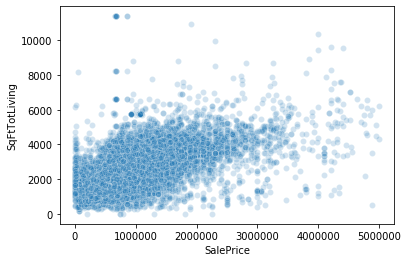

In [131]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=groomed_2019_above_zero, x='SalePrice', y='SqFtTotLiving', alpha=0.2)

In [132]:
fsm = ols(formula="SalePrice ~ SqFtTotLiving + TidelandShoreland + SqFtOpenPorch + SqFtDeck", data=groomed_df_above_zero).fit()

In [133]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                 5.267e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:19:21   Log-Likelihood:            -1.3911e+07
No. Observations:              970137   AIC:                         2.782e+07
Df Residuals:                  970132   BIC:                         2.782e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2.411e+04   1014.581     23.767      0.000    2.21e+04    2.61e+04
SqFtTotLiving       177.6369      0.471    377.141      0.000     176.714     178.560
TidelandShoreland  2.783e+05   2418.152    115.105      0.000    2.74e+05    2.83e+05
SqFtOpenPorch       134.3047      3.610     37.201      0.000     127.229     141.381
SqFtDeck            -25.6579      1.299    -19.747      0.000     -28.205     -23.111
==============================================================================
Omnibus:                   845317.069   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36363989.512
Skew:                           4.070   Prob(JB):                         0.00
Kurtosis:                      31.868   Cond. No.                     1.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.005053739145589
Rainbow p-value: 0.03959145240527391


In [135]:
fsm_2 = ols(formula="SalePrice ~ SqFtTotLiving + TidelandShoreland + SqFtOpenPorch + SqFtDeck", data=groomed_2019_above_zero).fit()

In [136]:
fsm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     4270.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:19:24   Log-Likelihood:            -4.2506e+05
No. Observations:               29621   AIC:                         8.501e+05
Df Residuals:                   29616   BIC:                         8.502e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.265e+05   5817.454     21.737      0.000    1.15e+05    1.38e+05
SqFtTotLiving       282.0029      2.729    103.336      0.000     276.654     287.352
TidelandShoreland   3.77e+05   1.49e+04     25.289      0.000    3.48e+05    4.06e+05
SqFtOpenPorch       177.2993     18.373      9.650      0.000     141.288     213.311
SqFtDeck            195.9824     11.759     16.666      0.000     172.934     219.031
==============================================================================
Omnibus:                    14640.055   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           222241.968
Skew:                           2.006   Prob(JB):                         0.00
Kurtosis:                      15.805   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_2)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0419608450301678
Rainbow p-value: 0.006195276212891833


In [143]:
for _ in combined_2019_filtered.columns:
    print(_)

Major_x
Minor_x
PropName
PlatName
PlatLot_x
PlatBlock_x
Range
Township
Section
QuarterSection
PropType
Area
SubArea
SpecArea
SpecSubArea
DistrictName
LevyCode
CurrentZoning
HBUAsIfVacant
HBUAsImproved
PresentUse
SqFtLot
WaterSystem
SewerSystem
Access
Topography
StreetSurface
RestrictiveSzShape
InadequateParking
PcntUnusable
Unbuildable
MtRainier
Olympics
Cascades
Territorial
SeattleSkyline
PugetSound
LakeWashington
LakeSammamish
SmallLakeRiverCreek
OtherView
WfntLocation
WfntFootage
WfntBank
WfntPoorQuality
WfntRestrictedAccess
WfntAccessRights
WfntProximityInfluence
TidelandShoreland
LotDepthFactor
TrafficNoise
AirportNoise
PowerLines
OtherNuisances
NbrBldgSites
Contamination
DNRLease
AdjacentGolfFairway
AdjacentGreenbelt
HistoricSite
CurrentUseDesignation
NativeGrowthProtEsmt
Easements
OtherDesignation
DeedRestrictions
DevelopmentRightsPurch
CoalMineHazard
CriticalDrainage
ErosionHazard
LandfillBuffer
HundredYrFloodPlain
SeismicHazard
LandslideHazard
SteepSlopeHazard
Stream
Wetland
S

In [157]:
fsm_3 = ols(formula="SalePrice ~ SqFtTotLiving + TidelandShoreland + SqFtOpenPorch + SqFtDeck + Area + Township", data=combined_2019_filtered).fit()

In [158]:
fsm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     4607.
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:29:22   Log-Likelihood:            -4.2204e+05
No. Observations:               29621   AIC:                         8.441e+05
Df Residuals:                   29614   BIC:                         8.442e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2.313e+06   3.29e+04    -70.365      0.000   -2.38e+06   -2.25e+06
SqFtTotLiving       274.7320      2.476    110.960      0.000     269.879     279.585
TidelandShoreland  3.934e+05   1.35e+04     29.219      0.000    3.67e+05     4.2e+05
SqFtOpenPorch       229.7415     16.639     13.807      0.000     197.128     262.355
SqFtDeck            133.1135     10.648     12.501      0.000     112.243     153.984
Area               -626.2932     82.954     -7.550      0.000    -788.887    -463.700
Township           1.046e+05   1337.327     78.213      0.000    1.02e+05    1.07e+05
==============================================================================
Omnibus:                    17120.728   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           407363.042
Skew:                           2.324   Prob(JB):                         0.00
Kurtosis:                      20.563   Cond. No.                     3.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_3)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0418759290894253
Rainbow p-value: 0.006284065726134874
